In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates
import plotly.express as px
from plotly.subplots import make_subplots
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)
%matplotlib inline

In [2]:
path_to_protocol5='/content/dataset_cleaned_popularity.pkl'

In [3]:
!pip3 install pickle5
import pickle5 as pickle
with open(path_to_protocol5, "rb") as fh:
  df = pickle.load(fh)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df.drop(columns=['index', 'level_0'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df.head(5)

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,10,1.0,1.0,global,4.31065,2018,11,5
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,191,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,1,1.0,1.0,spanish speaking,4.31065,2018,11,5
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,126,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,21,0.0,1.0,english speaking and nordic,4.31065,2018,11,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166681 entries, 0 to 166680
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              166681 non-null  object 
 1   uri                  166681 non-null  object 
 2   popularity           166681 non-null  float64
 3   title                166681 non-null  object 
 4   artist               166681 non-null  object 
 5   release_type         166681 non-null  object 
 6   sub_genre            166681 non-null  object 
 7   artist_followers     166681 non-null  float64
 8   explicit             166681 non-null  object 
 9   album                166681 non-null  object 
 10  release_date         166681 non-null  object 
 11  track_number         166681 non-null  object 
 12  tracks_in_album      166681 non-null  object 
 13  danceability         166681 non-null  float64
 14  energy               166681 non-null  float64
 15  key              

In [7]:
df['genre'].unique()

array(['hip hop', 'pop', 'metal', 'indie', 'rap', 'funk', 'r&b/soul',
       'k-pop', 'rock', 'dance/electronic', 'latin', 'trap', 'country',
       'house', 'reggaeton', 'boy band', 'else', 'bolero', 'reggae',
       'jazz', 'opm'], dtype=object)

## Distribution of Genres

In [8]:
hip_hop = df[df['genre']=='hip hop']  
pop = df[df['genre']=='pop'] 
metal = df[df['genre']=='metal'] 
indie = df[df['genre']=='indie'] 
rap = df[df['genre']=='rap'] 
funk = df[df['genre']=='funk'] 
k_pop = df[df['genre']=='k-pop'] 
rock = df[df['genre']=='rock'] 
latin = df[df['genre']=='latin'] 
trap = df[df['genre']=='trap'] 
country = df[df['genre']=='country'] 
house = df[df['genre']=='house'] 
reggaeton = df[df['genre']=='boy band'] 
boy_band = df[df['genre']=='hip hop'] 
else_genre = df[df['genre']=='else'] 
bolero = df[df['genre']=='bolero'] 
reggae = df[df['genre']=='reggae'] 
jazz = df[df['genre']=='jazz'] 
opm = df[df['genre']=='opm']                        
rb_soul = df[df['genre']=='r&b/soul'] 
dance_electronic = df[df['genre']=='dance/electronic'] 

In [9]:
print("pop genre: %i (%.1f%%)"%(len(pop),float(len(pop))/len(df)*100.0))
print("hip_hop genre: %i (%.1f%%)"%(len(hip_hop),float(len(hip_hop))/len(df)*100.0))
print("boy_band genre: %i (%.1f%%)"%(len(boy_band),float(len(boy_band))/len(df)*100.0))
print("rap genre: %i (%.1f%%)"%(len(rap),float(len(rap))/len(df)*100.0))
print("latin genre: %i (%.1f%%)"%(len(latin),float(len(latin))/len(df)*100.0))
print("indie genre: %i (%.1f%%)"%(len(indie),float(len(indie))/len(df)*100.0))
print("rock genre: %i (%.1f%%)"%(len(rock),float(len(rock))/len(df)*100.0))
print("dance_electronic genre: %i (%.1f%%)"%(len(dance_electronic),float(len(dance_electronic))/len(df)*100.0))
print("else_genre genre: %i (%.1f%%)"%(len(else_genre),float(len(else_genre))/len(df)*100.0))
print("house genre: %i (%.1f%%)"%(len(house),float(len(house))/len(df)*100.0))
print("k_pop genre: %i (%.1f%%)"%(len(k_pop),float(len(k_pop))/len(df)*100.0))
print("rb_soul genre: %i (%.1f%%)"%(len(rb_soul),float(len(rb_soul))/len(df)*100.0))
print("metal genre: %i (%.1f%%)"%(len(metal),float(len(metal))/len(df)*100.0))
print("reggaeton genre: %i (%.1f%%)"%(len(reggaeton),float(len(reggaeton))/len(df)*100.0))
print("trap genre: %i (%.1f%%)"%(len(trap),float(len(trap))/len(df)*100.0))
print("funk genre: %i (%.1f%%)"%(len(funk),float(len(funk))/len(df)*100.0))
print("country genre: %i (%.1f%%)"%(len(country),float(len(country))/len(df)*100.0))
print("opm genre: %i (%.1f%%)"%(len(opm),float(len(opm))/len(df)*100.0))
print("reggae genre: %i (%.1f%%)"%(len(reggae),float(len(reggae))/len(df)*100.0))
print("bolero genre: %i (%.1f%%)"%(len(bolero),float(len(bolero))/len(df)*100.0))
print("jazz genre: %i (%.1f%%)"%(len(jazz),float(len(jazz))/len(df)*100.0))
print("Total: %i"%len(df))

pop genre: 60020 (36.0%)
hip_hop genre: 35805 (21.5%)
boy_band genre: 35805 (21.5%)
rap genre: 13562 (8.1%)
latin genre: 9675 (5.8%)
indie genre: 7339 (4.4%)
rock genre: 6337 (3.8%)
dance_electronic genre: 5751 (3.5%)
else_genre genre: 4819 (2.9%)
house genre: 4713 (2.8%)
k_pop genre: 4526 (2.7%)
rb_soul genre: 4510 (2.7%)
metal genre: 2364 (1.4%)
reggaeton genre: 1983 (1.2%)
trap genre: 1682 (1.0%)
funk genre: 1052 (0.6%)
country genre: 700 (0.4%)
opm genre: 360 (0.2%)
reggae genre: 136 (0.1%)
bolero genre: 212 (0.1%)
jazz genre: 134 (0.1%)
Total: 166681


In [10]:
df['genre'].value_counts()/len(df)

pop                 0.360089
hip hop             0.214812
rap                 0.081365
latin               0.058045
indie               0.044030
rock                0.038019
dance/electronic    0.034503
else                0.028912
house               0.028276
k-pop               0.027154
r&b/soul            0.027058
metal               0.014183
boy band            0.011897
trap                0.010091
funk                0.006311
reggaeton           0.006005
country             0.004200
opm                 0.002160
bolero              0.001272
reggae              0.000816
jazz                0.000804
Name: genre, dtype: float64

In [11]:
df.columns

Index(['country', 'uri', 'popularity', 'title', 'artist', 'release_type',
       'sub_genre', 'artist_followers', 'explicit', 'album', 'release_date',
       'track_number', 'tracks_in_album', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acoustics', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'genre',
       'days_since_release', 'released_after_2017', 'explicit_false',
       'explicit_true', 'popu_max', 'top10_dummy', 'top50_dummy', 'cluster',
       'duration_min', 'release_year', 'release_month', 'release_day'],
      dtype='object')

In [15]:
df_pred = df.copy()

In [40]:
df_pred = df_pred.drop(columns=['uri','title', 'artist', 'release_type', 'artist_followers', 'explicit', 'album', 'release_date',
       'track_number', 'tracks_in_album', 'days_since_release', 'released_after_2017', 'explicit_false',
       'explicit_true', 'popu_max', 'top10_dummy', 'top50_dummy', 'cluster',
       'release_year', 'release_month', 'release_day', 'sub_genre']).reset_index(drop=True)
df_pred.head()

,country,popularity,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,duration_min
0,Global,31833.95,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4.0,hip hop,4.31065
1,USA,8.00,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4.0,hip hop,4.31065
2,Argentina,76924.40,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4.0,hip hop,4.31065
3,Belgium,849.60,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4.0,hip hop,4.31065
4,Switzerland,20739.10,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4.0,hip hop,4.31065


In [41]:
df_pred['key'] = df_pred['key'].astype(int)
df_pred['mode'] = df_pred['mode'].astype(int)
df_pred['time_signature'] = df_pred['time_signature'].astype(float)

In [42]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166681 entries, 0 to 166680
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   country           166681 non-null  object 
 1   popularity        166681 non-null  float64
 2   danceability      166681 non-null  float64
 3   energy            166681 non-null  float64
 4   key               166681 non-null  int64  
 5   loudness          166681 non-null  float64
 6   mode              166681 non-null  int64  
 7   speechiness       166681 non-null  float64
 8   acoustics         166681 non-null  float64
 9   instrumentalness  166681 non-null  float64
 10  liveness          166681 non-null  float64
 11  valence           166681 non-null  float64
 12  tempo             166681 non-null  float64
 13  time_signature    166681 non-null  float64
 14  genre             166681 non-null  object 
 15  duration_min      166681 non-null  float64
dtypes: float64(12), int6

In [43]:
df_pred.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,duration_min
count,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000
mean,5511.366120,0.667507,0.642905,5.273876,-6.526561,0.564923,0.123948,0.241169,0.014143,0.176447,0.491854,120.967824,3.962599,3.451090
std,13236.831027,0.144698,0.172137,3.640508,2.611996,0.495769,0.116585,0.247521,0.086087,0.136795,0.222129,28.839627,0.311784,0.837369
min,0.800000,0.000000,0.002620,0.000000,-43.988000,0.000000,0.000000,0.000002,0.000000,0.011900,0.000000,0.000000,0.000000,0.502217
25%,78.400000,0.578000,0.539000,2.000000,-7.680000,0.000000,0.042900,0.045500,0.000000,0.095300,0.322000,98.001000,4.000000,2.989683
50%,530.400000,0.684000,0.662000,5.000000,-6.113000,1.000000,0.071800,0.151000,0.000000,0.123000,0.486000,119.934000,4.000000,3.379100
75%,3995.050000,0.772000,0.770000,8.000000,-4.821000,1.000000,0.169000,0.367000,0.000039,0.210000,0.662000,140.007000,4.000000,3.808033
max,233766.900000,0.983000,1.000000,11.000000,1.634000,1.000000,0.955000,0.995000,0.987000,0.991000,0.989000,230.270000,5.000000,60.899283


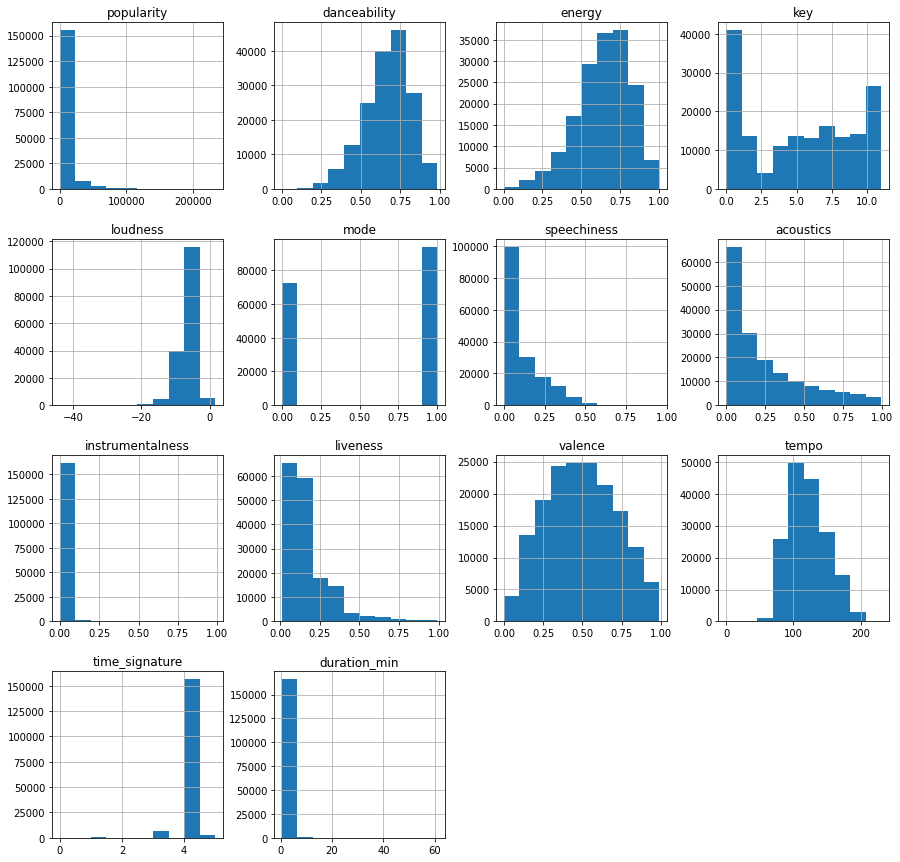

In [44]:
df_pred.hist(figsize = (15,15))
plt.show()

## Removing Outliers

According the distributions of features, outliers removed.
* First method is Z-score method for the features whose distribution is close to the normal distribution, drop those farther than 3 standard deviations from the mean.

* Second method is interquartile range method for the features whose distribution is collected on one side.Outliers are calculated by the difference between the first quarter and the third quarter and determines the min and max points accordingly.


In [24]:
def remove_outliers(df,name='feature'):
    #Store the 25th and 75th percentile 
    q25,q75=np.percentile(df[name],25),np.percentile(df[name],75)
    #Calculate the Interquartile range
    iqr_cut=1.5*(q75-q25)
    #Create variable of lower and upper cut
    lower,upper=q25-iqr_cut,q75+iqr_cut
    #Remove the outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df

def remove_outliers_gaussian(df,name='feature'):
    #calculate the mean and standard deviation
    mean,std=np.mean(df[name]),np.std(df[name])
    #create the cut variable
    std_cut= 3*std
    #create variable of lower and upper cut
    lower,upper=mean-std_cut,mean+std_cut
    #Remove outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df

In [45]:
df1=df_pred.copy()
print(len(df1))
df1=remove_outliers(df1,'acoustics')
print(len(df1))

166681
161204


In [46]:
print(len(df1))
df1=remove_outliers(df1,'speechiness')
print(len(df1))

161204
153009


In [47]:
print(len(df1))
df1=remove_outliers(df1,'liveness')
print(len(df1))

153009
142571


In [48]:
print(len(df1))
df1=remove_outliers_gaussian(df1,'danceability')
print(len(df1))

142571
142006


In [49]:
print(len(df1))
df1=remove_outliers_gaussian(df1,'energy')
print(len(df1))

142006
141574


In [50]:
print(len(df1))
df1=remove_outliers_gaussian(df1,'valence')
print(len(df1))

141574
141574


In [52]:
print(len(df1))
df1=remove_outliers_gaussian(df1,'tempo')
print(len(df1))

141475
141467


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141467 entries, 0 to 166680
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   country           141467 non-null  object 
 1   popularity        141467 non-null  float64
 2   danceability      141467 non-null  float64
 3   energy            141467 non-null  float64
 4   key               141467 non-null  int64  
 5   loudness          141467 non-null  float64
 6   mode              141467 non-null  int64  
 7   speechiness       141467 non-null  float64
 8   acoustics         141467 non-null  float64
 9   instrumentalness  141467 non-null  float64
 10  liveness          141467 non-null  float64
 11  valence           141467 non-null  float64
 12  tempo             141467 non-null  float64
 13  time_signature    141467 non-null  float64
 14  genre             141467 non-null  object 
 15  duration_min      141467 non-null  float64
dtypes: float64(12), int6

In [54]:
X = df1.drop(columns=['genre'])
y = df1['genre']

**Split the dataset**

In [59]:
from sklearn.model_selection import train_test_split
train_val_df,test_df=train_test_split(df1,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

In [60]:
print('Train_df.shape:',train_df.shape)
print('Val_df.shape:',val_df.shape)
print('Test_df.shape',test_df.shape)

Train_df.shape: (84879, 16)
Val_df.shape: (28294, 16)
Test_df.shape (28294, 16)


In [63]:
inputs_cols=df1.columns.tolist()[:-1]
target_col='genre'

In [64]:
#Create train inputs and target
train_inputs=train_df[inputs_cols].copy()
train_target=train_df[target_col].copy()

#Create val inputs and target
val_inputs=val_df[inputs_cols].copy()
val_target=val_df[target_col].copy()

#Create test inputs and target
test_inputs=test_df[inputs_cols].copy()
test_target=test_df[target_col].copy()

In [67]:
numerical_cols=train_inputs.select_dtypes(include=['float64','int64']).columns.tolist()
encoded_cols=['mode']
categorical_cols=train_inputs.select_dtypes(include=['object']).columns.tolist()

**Min-Max Scaling**

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

train_inputs[numerical_cols]=scaler.fit_transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=scaler.fit_transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=scaler.fit_transform(test_inputs[numerical_cols])

In [69]:
train_inputs[numerical_cols].describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature
count,84879.000000,84879.000000,84879.000000,84879.000000,84879.000000,84879.000000,84879.000000,84879.000000,84879.000000,84879.000000,84879.000000,84879.000000,84879.000000
mean,0.024752,0.580685,0.578056,0.480239,0.659025,0.560633,0.248723,0.255776,0.012499,0.361802,0.489751,0.471862,0.742672
std,0.058280,0.188746,0.189828,0.331888,0.095367,0.496313,0.254557,0.255604,0.079270,0.220659,0.231325,0.176174,0.068740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000339,0.461538,0.451970,0.181818,0.608908,0.000000,0.059689,0.049233,0.000000,0.213362,0.310524,0.333590,0.750000
50%,0.002443,0.601648,0.593596,0.545455,0.671591,1.000000,0.137832,0.164898,0.000000,0.280711,0.486273,0.465014,0.750000
75%,0.018916,0.715659,0.719212,0.727273,0.724253,1.000000,0.368512,0.392225,0.000039,0.450431,0.667221,0.590644,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Encode the categorical features to numerical values 

In [71]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

train_inputs['country']=encoder.fit_transform(train_inputs['country'])
val_inputs['country']=encoder.fit_transform(val_inputs['country'])
test_inputs['country']=encoder.fit_transform(test_inputs['country'])

In [94]:
encoded_cols=['country']

In [95]:
X_train=train_inputs[numerical_cols + encoded_cols]
X_val= val_inputs[numerical_cols + encoded_cols]
X_test=test_inputs[numerical_cols + encoded_cols]

## Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
model = LogisticRegression(multi_class = 'multinomial')

In [107]:
model.fit(X_train,train_target)
y_pred = model.predict(X_test)

In [108]:
accuracy_score(test_target,y_pred)

0.8469640206404184

## Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1, random_state=2).fit(X_train,train_target)
model.score(X_train,train_target)

1.0

In [105]:
model.score(X_val,val_target)

0.823425461228529

In [104]:
model.score(X_test,test_target)

0.8469640206404184

## Feature Importance

In [103]:
importance_df= pd.DataFrame({
    'feature': X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)
importance_df

,feature,importance
6,speechiness,0.124703
1,danceability,0.103513
11,tempo,0.102656
4,loudness,0.096966
2,energy,0.093973
10,valence,0.093723
7,acoustics,0.093526
9,liveness,0.083880
8,instrumentalness,0.055656
3,key,0.055369
